# Data Preparation

Preparing extracted features, clinical and PET params for modelling.

In [1]:
import sys
sys.path.append('../src/')

import os
import feature_postprep

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Target variables

In [2]:
raw_targets = pd.read_excel(
    './../../data/target/Responsdata-Radiomics-10092018.xlsx', 
    index_col=0
)
raw_targets.head()

,Unnamed: 1,Lokal,Regional,LRC,Unnamed: 5,PFS,Unnamed: 7,Unnamed: 8,Unnamed: 9,Respons,Forklaring,Unnamed: 12,Unnamed: 13,Antall,Unnamed: 15
ID,,,,,,,,,,,,,,,
2,NaN,0,0,0,NaN,0,NaN,NaN,NaN,LRC,Lokoregional kontroll,NaN,NaN,49.0,(Dvs. 49 pasienter har lokalt og/eller regiona...
4,NaN,0,0,0,NaN,0,NaN,NaN,NaN,PFS,Progresjonsfri overlevelse,NaN,NaN,64.0,(Dvs. 64 pasienter har lokalt og/eller regiona...
5,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_targets.columns

Index(['Unnamed: 1', 'Lokal', 'Regional ', 'LRC', 'Unnamed: 5', 'PFS',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Respons', 'Forklaring',
       'Unnamed: 12', 'Unnamed: 13', 'Antall ', 'Unnamed: 15'],
      dtype='object')

In [4]:
raw_targets.index

Int64Index([  2,   4,   5,   8,  10,  11,  12,  13,  14,  15,
            ...
            243, 244, 246, 247, 248, 249, 250, 252, 253, 254],
           dtype='int64', name='ID', length=198)

In [5]:
pfs = raw_targets.loc[:, 'PFS'].values
lrc = raw_targets.loc[:, 'LRC'].values

y_pfs = np.zeros(np.shape(pfs), dtype=int)
y_lrc = np.zeros(np.shape(lrc), dtype=int)
#y_lrc[pfs == 0] = 1, y[pfs == 0] = 1
y_pfs = np.array(pfs, dtype=int)
y_lrc = np.array(lrc, dtype=int)

In [6]:
target_pfs = pd.DataFrame(y_pfs, columns=['pfs'], index=raw_targets.index)
target_pfs.head()

,pfs
ID,
2,0
4,0
5,0
8,0
10,0


In [7]:
target_lrc = pd.DataFrame(y_lrc, columns=['lrc'], index=raw_targets.index)
target_lrc.head()

,lrc
ID,
2,0
4,0
5,0
8,0
10,0


In [8]:
target_lrc.to_csv('./../../data/fallback/data_to_analysis/target_lrc.csv', sep=',')
target_pfs.to_csv('./../../data/fallback/data_to_analysis/target_pfs.csv', sep=',')

In [9]:
# Sanity check
sum(target_lrc.index != target_pfs.index) == 0

True

## Clinical data and PET params

In [10]:
pet_params = pd.read_excel('./../../data/tabular/pet_params.xlsx')
pet_params.head()

,'patientID','volume','SUVmax','SUVpeak','MTV','TLG',Unnamed: 6,%EXPLANATIONS:
0,1,0.000,NaN,NaN,NaN,NaN,NaN,%volume: Volume of primary tumor [cm3](alread...
1,2,17.142,24.7412,21.616549,7.384,124.870726,NaN,%SUVmax: Maximum SUV in the primary tumor vol...
2,3,0.000,NaN,NaN,NaN,NaN,NaN,%SUVpeak: Maximum mean value of SUV in a spher...
3,4,9.661,18.6557,15.296275,3.406,41.554406,NaN,% where the center of the sphere (regi...
4,5,16.214,16.7395,14.473272,7.934,86.228420,NaN,% must belong to the tumor volume.


In [11]:
prep_pet_params = pet_params.copy()

In [12]:
prep_pet_params.index = prep_pet_params[prep_pet_params.columns[0]]
prep_pet_params.index.name = 'patient'
prep_pet_params.columns = [
    'X', 'volume', 'suv_max', 'suv_peak', 'mtv', 'tlg', 'Y', 'Z'
]
prep_pet_params.head()

,X,volume,suv_max,suv_peak,mtv,tlg,Y,Z
patient,,,,,,,,
1,1,0.000,NaN,NaN,NaN,NaN,NaN,%volume: Volume of primary tumor [cm3](alread...
2,2,17.142,24.7412,21.616549,7.384,124.870726,NaN,%SUVmax: Maximum SUV in the primary tumor vol...
3,3,0.000,NaN,NaN,NaN,NaN,NaN,%SUVpeak: Maximum mean value of SUV in a spher...
4,4,9.661,18.6557,15.296275,3.406,41.554406,NaN,% where the center of the sphere (regi...
5,5,16.214,16.7395,14.473272,7.934,86.228420,NaN,% must belong to the tumor volume.


In [13]:
# Dropping features
prep_pet_params.drop(
    ['X', 'Y', 'Z', 'suv_max', 'volume'], axis=1, inplace=True
)

In [14]:
# Dropping NaNs
prep_pet_params.dropna(axis=0, inplace=True)
prep_pet_params.head()

,suv_peak,mtv,tlg
patient,,,
2,21.616549,7.384,124.870726
4,15.296275,3.406,41.554406
5,14.473272,7.934,86.228420
8,10.510859,26.926,205.413389
10,7.213190,6.041,32.103770


In [15]:
# Filtering with target cases
pet_params = prep_pet_params.loc[target_lrc.index, :]
pet_params.to_csv('./../../data/fallback/data_to_analysis/pet_params.csv')

In [16]:
raw_clinical = pd.read_excel(
    './../../data/tabular/clinical_params.xlsx', index_col=0, header=0
)
raw_clinical.head()

,Alder,Kjønn,ICD10 kort,T-klassifisering,N-klassifisering,Stadium,Histologi,HPV-status,ECOG,Charlson,Pakkeår,Naxogin dager,Cisplatin
Pasient-ID,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,32.141096,29.0,0
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,0.000000,39.0,6
3,75.663014,M,C32,2,0,2,1.0,2,0,0,55.663014,41.0,0
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,4.786027,33.0,5
5,54.238356,K,C09,2,0,2,0.0,0,0,0,0.000000,42.0,0


In [17]:
prep_clinical = raw_clinical.copy()

In [18]:
raw_clinical['T-klassifisering'].unique()

array([4, 2, 1, 3])

In [19]:
prep_clinical.index.name = 'patient'
prep_clinical.columns = [
    'age', 'sex', 'icd10', 't_class', 'n_class', 'stage', 'histology', 'hpv', 
    'ecog', 'charlson', 'year_smoking', 'days_naxogin', 'cisplatin'
]
prep_clinical.head()

,age,sex,icd10,t_class,n_class,stage,histology,hpv,ecog,charlson,year_smoking,days_naxogin,cisplatin
patient,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,32.141096,29.0,0
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,0.000000,39.0,6
3,75.663014,M,C32,2,0,2,1.0,2,0,0,55.663014,41.0,0
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,4.786027,33.0,5
5,54.238356,K,C09,2,0,2,0.0,0,0,0,0.000000,42.0,0


In [20]:
# NOTE: Stage feature req extra attention.
to_encode = [
    'sex', 'icd10', 't_class', 'n_class', 'histology', 'hpv', 
    'ecog', 'charlson', 'cisplatin'
]

for num, var_to_encode in enumerate(to_encode):
    dummy_var = pd.get_dummies(prep_clinical[var_to_encode], drop_first=True)
    dummy_var.columns = [
        '{}_{}'.format(var_to_encode, column) for column in dummy_var.columns
    ]
    prep_clinical[dummy_var.columns] = dummy_var

In [21]:
prep_clinical.columns

Index(['age', 'sex', 'icd10', 't_class', 'n_class', 'stage', 'histology',
       'hpv', 'ecog', 'charlson', 'year_smoking', 'days_naxogin', 'cisplatin',
       'sex_M', 'icd10_C02', 'icd10_C03', 'icd10_C04', 'icd10_C05',
       'icd10_C06', 'icd10_C09', 'icd10_C10', 'icd10_C12', 'icd10_C13',
       'icd10_C32', 't_class_2', 't_class_3', 't_class_4', 'n_class_1',
       'n_class_2', 'n_class_3', 'histology_0.5', 'histology_1.0',
       'histology_2.0', 'histology_3.0', 'hpv_1', 'hpv_2', 'ecog_1', 'ecog_2',
       'ecog_3', 'charlson_1', 'charlson_2', 'charlson_3', 'charlson_4',
       'charlson_5', 'charlson_6', 'cisplatin_1', 'cisplatin_2', 'cisplatin_3',
       'cisplatin_4', 'cisplatin_5', 'cisplatin_6', 'cisplatin_7'],
      dtype='object')

In [22]:
prep_clinical.head()

,age,sex,icd10,t_class,n_class,stage,histology,hpv,ecog,charlson,...,charlson_4,charlson_5,charlson_6,cisplatin_1,cisplatin_2,cisplatin_3,cisplatin_4,cisplatin_5,cisplatin_6,cisplatin_7
patient,,,,,,,,,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
3,75.663014,M,C32,2,0,2,1.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,...,0,0,0,0,0,0,0,1,0,0
5,54.238356,K,C09,2,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Drop encdoded features
prep_clinical.drop(to_encode, axis=1, inplace=True)
prep_clinical.head()

,age,stage,year_smoking,days_naxogin,sex_M,icd10_C02,icd10_C03,icd10_C04,icd10_C05,icd10_C06,...,charlson_4,charlson_5,charlson_6,cisplatin_1,cisplatin_2,cisplatin_3,cisplatin_4,cisplatin_5,cisplatin_6,cisplatin_7
patient,,,,,,,,,,,,,,,,,,,,,
1,57.854795,4a,32.141096,29.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.832877,4a,0.000000,39.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,75.663014,2,55.663014,41.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49.906849,4a,4.786027,33.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,54.238356,2,0.000000,42.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
prep_clinical.stage.replace(['4a', '4b', '4c', '4a?'], 4, inplace=True)
stadium_enc = pd.get_dummies(prep_clinical.stage, drop_first=True)
for col in stadium_enc:
    prep_clinical['stage_{}'.format(col)] = stadium_enc[col]

prep_clinical.head()

,age,stage,year_smoking,days_naxogin,sex_M,icd10_C02,icd10_C03,icd10_C04,icd10_C05,icd10_C06,...,cisplatin_2,cisplatin_3,cisplatin_4,cisplatin_5,cisplatin_6,cisplatin_7,stage_1,stage_2,stage_3,stage_4
patient,,,,,,,,,,,,,,,,,,,,,
1,57.854795,4,32.141096,29.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,60.832877,4,0.000000,39.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,75.663014,2,55.663014,41.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,49.906849,4,4.786027,33.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,54.238356,2,0.000000,42.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
prep_clinical.drop('stage', axis=1, inplace=True)
prep_clinical.head()

,age,year_smoking,days_naxogin,sex_M,icd10_C02,icd10_C03,icd10_C04,icd10_C05,icd10_C06,icd10_C09,...,cisplatin_2,cisplatin_3,cisplatin_4,cisplatin_5,cisplatin_6,cisplatin_7,stage_1,stage_2,stage_3,stage_4
patient,,,,,,,,,,,,,,,,,,,,,
1,57.854795,32.141096,29.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,60.832877,0.000000,39.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,75.663014,55.663014,41.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,49.906849,4.786027,33.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5,54.238356,0.000000,42.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Filtering with target indices
prep_clinical_reidx = prep_clinical.loc[target_lrc.index, :]

In [27]:
prep_clinical_reidx.to_csv('./../../data/fallback/data_to_analysis/clinical_vars.csv')

In [28]:
# Concatenate with PET params
clinical_params = pd.concat((prep_clinical_reidx, pet_params), axis=1)
clinical_params.to_csv('./../../data/fallback/data_to_analysis/combo_clinical_vars.csv')

In [29]:
clinical_params.shape

(198, 49)

## Prep image data

In [30]:
path_pet_features = './../../data/fallback/image_features/pet_features.csv'
path_ct_features = './../../data/fallback/image_features/ct_features.csv'

In [31]:
raw_ct_features = pd.read_csv(path_ct_features, index_col=0)
raw_pet_features = pd.read_csv(path_pet_features, index_col=0)
raw_ct_features.shape, raw_pet_features.shape

((198, 118), (198, 118))

In [32]:
raw_pet_features.index = clinical_params.index
raw_ct_features.index = clinical_params.index

In [33]:
# Features extracted from original image.
shape_columns = raw_ct_features.filter(regex='shape').columns

# Features extracted from filtered image.
target_ct_columns = raw_ct_features.filter(regex='squareroot').columns
target_pet_columns = raw_pet_features.filter(regex='squareroot').columns

pet_features = raw_pet_features[target_pet_columns]
ct_features = raw_ct_features[target_ct_columns]
pet_features.shape, ct_features.shape, shape_columns.shape

((198, 89), (198, 89), (10,))

In [34]:
# Ensure unique identifiers on PET and CT features.
pet_features.columns = ['pet_{}'.format(label) for label in pet_features.columns]
ct_features.columns = ['ct_{}'.format(label) for label in ct_features.columns]

In [35]:
X = pd.concat(
    (
        clinical_params, pet_features, ct_features,
        raw_ct_features.filter(regex='shape')
    ), 
    axis=1
)
X.shape

(198, 237)

In [36]:
X.filter(regex='pet').columns.size

89

In [37]:
X.filter(regex='ct').columns.size

89

In [38]:
X.filter(regex='shape').columns.size

10

In [39]:
X.head()

,age,year_smoking,days_naxogin,sex_M,icd10_C02,icd10_C03,icd10_C04,icd10_C05,icd10_C06,icd10_C09,...,original_shape_Volume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_Sphericity,original_shape_Maximum3DDiameter,original_shape_Maximum2DDiameterSlice,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Elongation,original_shape_Flatness
ID,,,,,,,,,,,,,,,,,,,,,
2,60.832877,0.000000,39.0,1,0,0,0,0,0,1,...,17142.0,4860.055715,0.283517,0.661532,45.617979,42.720019,41.976184,44.598206,0.738882,0.723925
4,49.906849,4.786027,33.0,0,0,0,0,0,0,1,...,9661.0,3126.087371,0.323578,0.701721,38.704005,29.410882,38.587563,35.468296,0.796900,0.629917
5,54.238356,0.000000,42.0,0,0,0,0,0,0,1,...,16214.0,4063.633046,0.250625,0.762365,46.454279,32.015621,46.065171,43.011626,0.600926,0.535140
8,54.687671,18.343836,0.0,1,0,0,0,0,0,0,...,69354.0,15698.615155,0.226355,0.520001,83.438600,65.764732,74.148500,80.956779,0.784571,0.414247
10,61.728767,0.000000,35.0,1,0,0,0,0,0,0,...,10749.0,3658.448414,0.340352,0.643822,43.150898,33.015148,33.286634,38.013156,0.690320,0.539743


Remove features with missing values (invalid value encountered during extraction)

In [40]:
missing_value_cols = X.columns[X.isnull().any()]
missing_value_cols

Index(['pet_squareroot_ngtdm_Contrast'], dtype='object')

In [41]:
pd.Series(missing_value_cols).to_csv('./../../data/fallback/missing_value_features.txt')

In [42]:
X.shape

(198, 237)

In [43]:
X.drop(missing_value_cols, axis=1, inplace=True)

In [44]:
# NOTE: Missing in both PET and CT image
X.shape

(198, 236)

Remove features with only constant values (failed during extraction)

In [45]:
# Could indicate to course discretization.
constant_cols = X.columns[X.var() == 0.0]
constant_cols 

Index(['histology_0.5', 'ecog_3', 'charlson_6', 'cisplatin_7',
       'pet_squareroot_firstorder_Entropy',
       'pet_squareroot_glcm_Autocorrelation',
       'pet_squareroot_glcm_JointAverage',
       'pet_squareroot_glcm_ClusterProminence',
       'pet_squareroot_glcm_ClusterShade',
       'pet_squareroot_glcm_ClusterTendency', 'pet_squareroot_glcm_Contrast',
       'pet_squareroot_glcm_Correlation',
       'pet_squareroot_glcm_DifferenceAverage',
       'pet_squareroot_glcm_DifferenceVariance',
       'pet_squareroot_glcm_JointEnergy', 'pet_squareroot_glcm_Imc1',
       'pet_squareroot_glcm_Imc2', 'pet_squareroot_glcm_Idm',
       'pet_squareroot_glcm_Idmn', 'pet_squareroot_glcm_Id',
       'pet_squareroot_glcm_Idn', 'pet_squareroot_glcm_InverseVariance',
       'pet_squareroot_glcm_MaximumProbability',
       'pet_squareroot_glcm_SumAverage', 'pet_squareroot_glcm_SumSquares',
       'pet_squareroot_glrlm_GrayLevelNonUniformityNormalized',
       'pet_squareroot_glrlm_GrayLevelVari

In [46]:
pd.Series(constant_cols).to_csv('./../../data/fallback/failed_extraction_features.txt')

In [47]:
X.columns.size - constant_cols.size

195

In [48]:
len(constant_cols)

41

In [48]:
X.drop(constant_cols, axis=1, inplace=True)

In [49]:
X.shape

(198, 195)

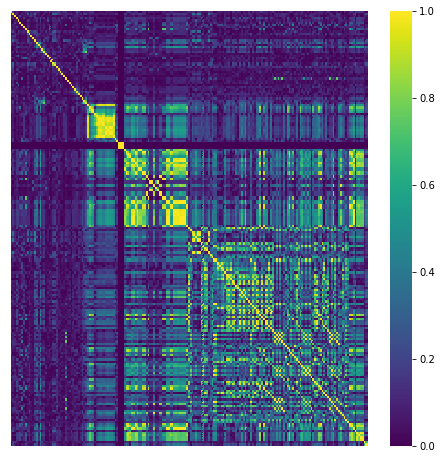

In [50]:
# Create correlation matrix
corr_matrix = X.corr().abs()
plt.figure(figsize=(8, 8))
axis = sns.heatmap(
    corr_matrix,
    cmap=plt.cm.viridis,
    xticklabels='', yticklabels=''
);
plt.savefig('./../../data/fallback/figures/pre_covar_matrix.png')

Remove correlated features (to improve interpretability of selected features).

In [51]:
# Find index of feature columns with correlation greater than thresh
THRESH = 0.85

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > THRESH)]
len(to_drop )

108

In [52]:
X.shape

(198, 195)

In [53]:
X.drop(to_drop, axis=1, inplace=True)

In [54]:
X.shape

(198, 87)

In [55]:
X.to_csv('./../../data/fallback/data_to_analysis/data.csv')

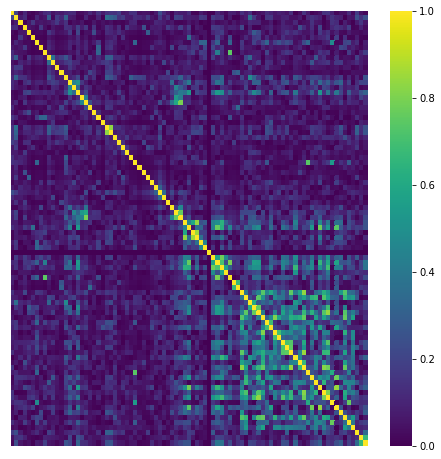

In [56]:
# Create PET correlation matrix
corr_matrix = X.corr().abs()
plt.figure(figsize=(8, 8))
axis = sns.heatmap(
    corr_matrix,
    cmap=plt.cm.viridis,
    xticklabels='', yticklabels=''
);
plt.savefig('./../../data/fallback/figures/post_covar_matrix.png')